In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sn
import time
import tensorflow_datasets as tfds
import json

A) Brief Explanation of DenseNet

DenseNet121 Architecture: <br>
Convolution; Pooling; Dense Block (1); Transition Layer (1); Dense Block (2); Transition Layer (2); Dense Block (3); Transition Layer (3); Dense Block (4); Classification Layer <br>
Convolution = 7x7 conv, stride 2x2 <br>
Pooling = 3*3 max pooling, stride 2x2 <br>
Dense Block (1) = (1x1, 3x3) x 6 <br>
Transition Layer (1) = 1x1 conv; 2x2 average pooling, stride 2x2 <br>
Dense Block (2) = (1x1, 3x3) x 12 <br>
Transition Layer (2) = 1x1 conv; 2x2 average pooling, stride 2x2 <br>
Dense Block (3) = (1x1, 3x3) x 24 <br>
Transition Layer (3) = 1x1 conv; 2x2 average pooling, stride 2x2 <br>
Dense Block (4) = (1x1, 3x3) x 16 <br>
Classification Layer = global average pooling; 1000D FC; Softmax <br>
Note that each 'conv' layer corresponds the sequence BN-ReLU-Conv.

To be more precise:

In [ ]:
model = tf.keras.applications.densenet.DenseNet121()
print(model.summary())

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_4[0][0]']       
                                )                                                       

Various types of DenseNet are different in the form of Dense Blocks. <br>
DenseNet121: <br>
Dense Block (1) = (1x1, 3x3) x 6 <br>
Dense Block (2) = (1x1, 3x3) x 12 <br>
Dense Block (3) = (1x1, 3x3) x 24 <br>
Dense Block (4) = (1x1, 3x3) x 16 <br>
DenseNet169: <br>
Dense Block (1) = (1x1, 3x3) x 6 <br>
Dense Block (2) = (1x1, 3x3) x 12 <br>
Dense Block (3) = (1x1, 3x3) x 32 <br>
Dense Block (4) = (1x1, 3x3) x 32 <br>
DenseNet201: <br>
Dense Block (1) = (1x1, 3x3) x 6 <br>
Dense Block (2) = (1x1, 3x3) x 12 <br>
Dense Block (3) = (1x1, 3x3) x 48 <br>
Dense Block (4) = (1x1, 3x3) x 32 <br>
DenseNet264: <br>
Dense Block (1) = (1x1, 3x3) x 6 <br>
Dense Block (2) = (1x1, 3x3) x 12 <br>
Dense Block (3) = (1x1, 3x3) x 64 <br>
Dense Block (4) = (1x1, 3x3) x 48 <br>

Advantages of DenseNet: <br> 1. DenseNet decreases the vanishing-gradient problem <br> 2. DenseNet improves feature propagation in forwarding fashion as well as backward fashion <br> 3. DenseNet encourages feature reuse. <br> 4. DenseNet reduces the number of parameters. <br>
Disadvantages of DenseNet: <br> 1. The excessive connections of DenseNet not only decrease the network's computation-efficiency and parameter-efficiency but also make the network more prone to overfitting. <br> 2. DenseNet uses a lot of memory, as the tensors from different layers are concatenated together.

The shape of input picture has to be (224, 224, 3) (with 'channels_last' data format) or (3, 224, 224) (with 'channels_first' data format).

For preprocessing, the data is normalized using the channel means and standard deviations.

The size of the output depends on the task that must be done and the number of dataset classes.
The size of the output is 1000 in the ImageNet case because it is an image classification task, and its dataset has 1000 classes.

B)

In [ ]:
model = tf.keras.applications.densenet.DenseNet121()

33202176/33188688 [==============================] - 1s 0us/step


C)

In [ ]:
img = plt.imread('./drive/MyDrive/DL - HW2 Practical/test_german_shepherd.jpg')
preprocessed_img = tf.keras.applications.densenet.preprocess_input(img)[np.newaxis, ...]
predicted_probabilities = model.predict(preprocessed_img)
top_3_predictions = tf.keras.applications.densenet.decode_predictions(predicted_probabilities, top=3)
print(top_3_predictions)

[[('n02106662', 'German_shepherd', 0.9782144), ('n02105162', 'malinois', 0.018880423), ('n02111129', 'Leonberg', 0.00046678408)]]


D) To deal with this problem, we accept model output only if the probability of the prediction be greater than 0.5 

In [ ]:
img = plt.imread('./drive/MyDrive/DL - HW2 Practical/test_white_background.jpg')
preprocessed_img = tf.keras.applications.densenet.preprocess_input(img)[np.newaxis, ...]
predicted_probabilities = model.predict(preprocessed_img)
predicted_class = tf.keras.applications.densenet.decode_predictions(predicted_probabilities, top=1)
if predicted_class[0][0][2] >= 0.5:
  print('Predicted Class =', predicted_class[0][0][1])
  print('Prediction Probability =', predicted_class[0][0][2])
else:
  print('The model prediction is not valid.')

The model prediction is not valid.


E)

In [ ]:
with open('./drive/MyDrive/DL - HW2 Practical/ImageNet_classes_names.txt') as f:
    data = eval(f.read())
print(data)

{0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark', 5: 'electric ray, crampfish, numbfish, torpedo', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich, Struthio camelus', 10: 'brambling, Fringilla montifringilla', 11: 'goldfinch, Carduelis carduelis', 12: 'house finch, linnet, Carpodacus mexicanus', 13: 'junco, snowbird', 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 15: 'robin, American robin, Turdus migratorius', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water ouzel, dipper', 21: 'kite', 22: 'bald eagle, American eagle, Haliaeetus leucocephalus', 23: 'vulture', 24: 'great grey owl, great gray owl, Strix nebulosa', 25: 'European fire salamander, Salamandra salamandra', 26: 'common newt, Triturus vulgaris', 27: 'eft', 28: 'spotted salamander, Ambystoma maculatum', 29: 'axolotl, mu

We first use classes 'American Bulldog' and 'American Pit Bull Terrier' of Oxford IIIT Pet Dataset'

In [ ]:
dataset, info = tfds.load('oxford_iiit_pet', with_info=True)
print(dataset.keys())
print(info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteLYEBRN/oxford_iiit_pet-train.tfrecord


  0%|          | 0/3680 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteLYEBRN/oxford_iiit_pet-test.tfrecord


  0%|          | 0/3669 [00:00<?, ? examples/s]

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.
dict_keys(['test', 'train'])
tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    version=3.2.0,
    description='The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
images for each class. The images have large variations in scale, pose and
lighting. All images have an associated ground truth annotation of breed.',
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=tf.uint8),
        'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=7349,
    splits={
        'test': 3669,
        'train': 368

In [ ]:
def load_image(datapoint):
  input_image = tf.image.resize(datapoint['image'], (224, 224), method='nearest')
  input_label = datapoint['label']
  input_species = datapoint['species']
  return input_image, input_label, input_species
train = dataset['train'].map(load_image)
train_images = []
train_labels = []
train_species = []
for image, label, species  in train.take(info.splits['train'].num_examples):
  train_images.append(image.numpy())
  train_labels.append(label.numpy())
  train_species.append(species.numpy())
train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_species = np.array(train_species)
test = dataset['test'].map(load_image)
test_images = []
test_labels = []
test_species = []
for image, label, species in test.take(info.splits['test'].num_examples):
  test_images.append(image.numpy())
  test_labels.append(label.numpy())
  test_species.append(species.numpy())
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_species = np.array(test_species)

In [ ]:
images = np.concatenate((train_images, test_images))
labels = np.concatenate((train_labels, test_labels))
species = np.concatenate((train_species, test_species))

In [ ]:
number_of_classes = 2
class_names = ['american bulldog', 'american pit bull terrier']

In [ ]:
first_class_label = 20
second_class_label = 25
first_class_images = images[labels==first_class_label]
second_class_images = images[labels==second_class_label]
two_classes_images = images[np.logical_or(labels==first_class_label, labels==second_class_label)]
two_classes_labels = (labels[np.logical_or(labels==first_class_label, labels==second_class_label)]-first_class_label)//(second_class_label-first_class_label)
two_classes_train_images = two_classes_images[0: int(0.9*two_classes_images.shape[0])]
two_classes_preprocessed_train_images = tf.keras.applications.densenet.preprocess_input(two_classes_train_images)
two_classes_train_labels = two_classes_labels[0: int(0.9*two_classes_labels.shape[0])]
two_classes_train_labels_one_hot = tf.one_hot(two_classes_train_labels, number_of_classes)
two_classes_validation_images = two_classes_images[int(0.9*two_classes_images.shape[0]): two_classes_images.shape[0]]
two_classes_preprocessed_validation_images = tf.keras.applications.densenet.preprocess_input(two_classes_validation_images)
two_classes_validation_labels = two_classes_labels[int(0.9*two_classes_labels.shape[0]): two_classes_labels.shape[0]]
two_classes_validation_labels_one_hot = tf.one_hot(two_classes_validation_labels, number_of_classes)

In [ ]:
random_number = np.random.randint(1e9)
np.random.seed(random_number)
permutation = np.random.choice(range(two_classes_train_images.shape[0]), two_classes_train_images.shape[0], False)
two_classes_train_images = two_classes_train_images[permutation]
two_classes_train_labels = two_classes_train_labels[permutation]

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
output_size = number_of_classes
batch_size = 20
number_of_epochs = 50

In [ ]:
model = tf.keras.models.Sequential(name='transfer_learning_oxford_IIIT_pet')
model.add(tf.keras.applications.densenet.DenseNet121(include_top=False, input_shape=(224, 224, 3)))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax', name='output'))
print(model.summary())

Model: "transfer_learning_oxford_IIIT_pet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 output (Dense)              (None, 2)                 100354    
                                                                 
Total params: 7,137,858
Trainable params: 7,054,210
Non-trainable params: 83,648
_________________________________________________________________
None


In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)
loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')

In [ ]:
def scheduler(epoch, lr):
  return lr/1.1
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(two_classes_preprocessed_train_images, two_classes_train_labels_one_hot, batch_size=batch_size, epochs=number_of_epochs, callbacks=[lr_cb], validation_data=(two_classes_preprocessed_validation_images, two_classes_validation_labels_one_hot))
model.save('./drive/MyDrive/DL - HW2 Practical/models/transfer_learning_oxford_IIIT_pet')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/50
18/18 [==============================] - 12s 671ms/step - loss: 69.0203 - accuracy: 0.5389 - val_loss: 321913424902629326999031585439744.0000 - val_accuracy: 0.5000 - lr: 0.1818
Epoch 2/50
18/18 [==============================] - 12s 665ms/step - loss: 20.4542 - accuracy: 0.5250 - val_loss: 135740156467478528.0000 - val_accuracy: 0.5250 - lr: 0.1653
Epoch 3/50
18/18 [==============================] - 12s 664ms/step - loss: 14.3334 - accuracy: 0.5472 - val_loss: 8395586273280.0000 - val_accuracy: 0.5250 - lr: 0.1503
Epoch 4/50
18/18 [==============================] - 12s 686ms/step - loss: 5.1129 - accuracy: 0.6111 - val_loss: 1543305472.0000 - val_accuracy: 0.4750 - lr: 0.1366
Epoch 5/50
18/18 [==============================] - 12s 685ms/step - loss: 5.7188 - accuracy: 0.6111 - val_loss: 1838124.3750 - val_accuracy: 0.5250 - lr: 0.1242
Epoch 6/50
18/18 [==============================] - 12s 667ms/step - loss: 2.1856 - accuracy: 0.5917 - val_loss: 374797.3125 - val_accuracy: 

INFO:tensorflow:Assets written to: ./drive/MyDrive/DL - HW2 Practical/models/transfer_learning_oxford_IIIT_pet/assets


In [ ]:
hist_df = pd.DataFrame(history.history)
with open('./drive/MyDrive/DL - HW2 Practical/models/transfer_learning_oxford_IIIT_pet/history.csv', mode='w') as f:
    hist_df.to_csv(f)

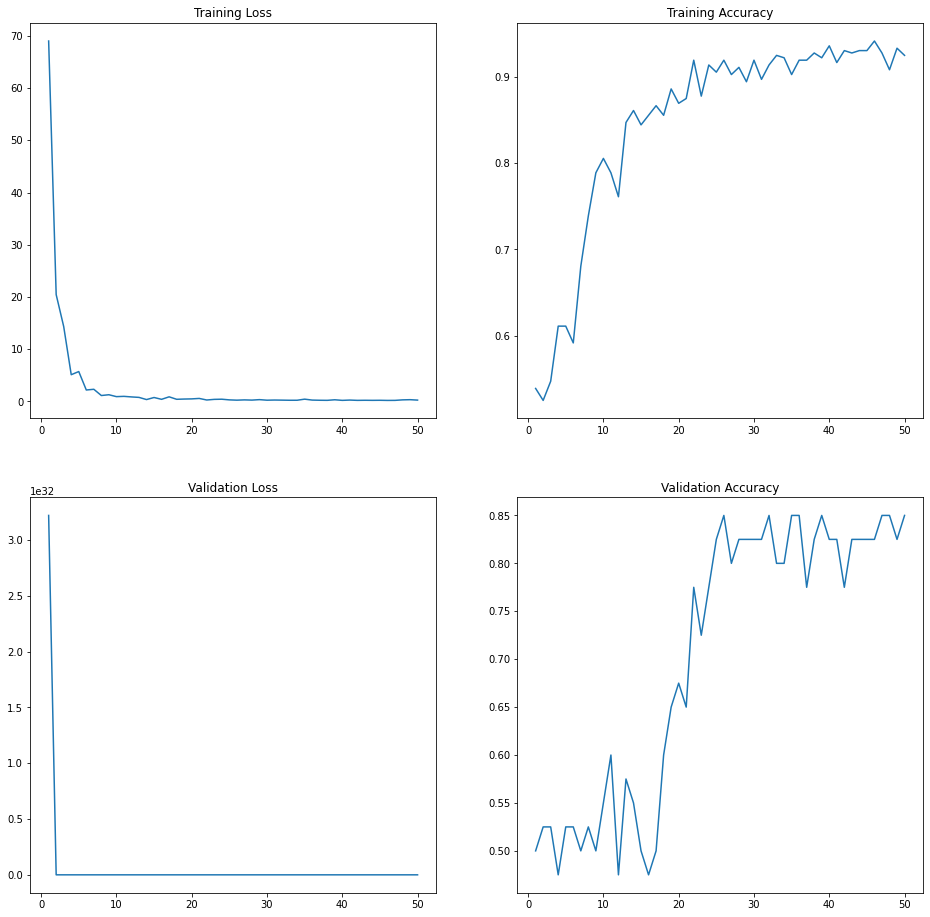

In [ ]:
history = pd.read_csv('./drive/MyDrive/DL - HW2 Practical/models/transfer_learning_oxford_IIIT_pet/history.csv')
plt.rcParams['figure.figsize'] = [16, 16]
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.set_title('Training Loss')
plt.plot(range(1, 51), history['loss'])
ax = fig.add_subplot(2, 2, 2)
ax.set_title('Training Accuracy')
plt.plot(range(1, 51), history['accuracy'])
ax = fig.add_subplot(2, 2, 3)
ax.set_title('Validation Loss')
plt.plot(range(1, 51), history['val_loss'])
ax = fig.add_subplot(2, 2, 4)
ax.set_title('Validation Accuracy')
plt.plot(range(1, 51), history['val_accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


2/2 [==============================] - 1s 342ms/step - loss: 0.4079 - accuracy: 0.8500
Validation Loss =  0.4079318642616272
Validation Accuracy =  0.8500000238418579


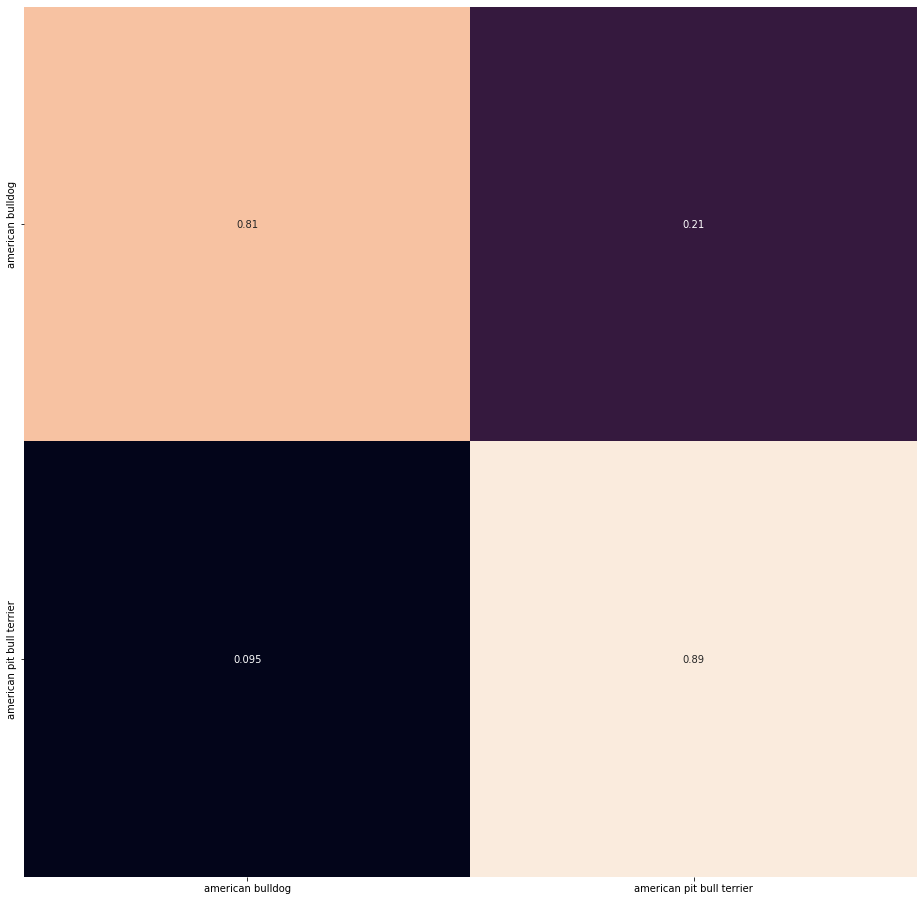

In [ ]:
model = tf.keras.models.load_model('./drive/MyDrive/DL - HW2 Practical/models/transfer_learning_oxford_IIIT_pet')
[validation_loss, validation_accuracy] = model.evaluate(two_classes_preprocessed_validation_images, two_classes_validation_labels_one_hot)
print('Validation Loss = ', validation_loss)
print('Validation Accuracy = ', validation_accuracy)
predicted_validation_labels = model.predict(two_classes_preprocessed_validation_images)
confusion_matrix = tf.math.confusion_matrix(two_classes_validation_labels, np.argmax(predicted_validation_labels, axis=-1), number_of_classes).numpy()
confusion_matrix = confusion_matrix/confusion_matrix.sum(axis=1)
df = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(16, 16))
sn.heatmap(df, annot=True, cbar=False)